<p style="text-align:center;">
<img src="https://github.com/digital-futures-academy/DataScienceMasterResources/blob/main/Resources/datascience-notebook-header.png?raw=true"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

# Movies Database Exploration

> In this notebook I will explore the data from the movies dataframe that I have been provided with.
> I will start by importing the data and cleaning it.
> From there I will explore the data and try to extract insights from it.
> I will create graphs to show anything that I find interesting.
> Throughout the notebook I will add annotations to my code to make it more readable and I will write down insights I find from the data.
> We can discuss these any of these insights during or after my notebook presentation.

## Importing libraries and data
<u>Initial Information:</u>
* 20 Columns,
* 4803 Rows,
* There are null values in the data.

In [4]:
# Import the libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Read the data file.
df = pd.read_csv('TMDB_movies.csv')

In [8]:
# Get the column info.
df.info()

# 20 Columns (Ordered alphabetically).
# 4803 rows.
# Some columns contain null entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## Dealing with nulls
<u>Columns containing nulls:</u>

* homepage: 3091,
* overview: 3,
* release_date: 1,
* runtime: 2,
* tagline: 844.

In [10]:
# Count the nulls in each column.
df.isnull().sum()

# homepage: 3091 nulls.
# overview: 3 nulls.
# release_date: 1 null.
# runtime: 2 nulls.
# tagline: 844 nulls.

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [12]:
# Make a copy of the original dataframe.
df_original = df.copy()

##### Homepage column
* Replaced all null values with 'No homepage'.

In [14]:
# Can assume homepage nulls mean there isn't a homepage.
df[df.homepage.isnull()].head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
15,225000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",NaN,2454,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,"[{""name"": ""Walt Disney"", ""id"": 5888}, {""name"":...","[{""iso_3166_1"": ""CZ"", ""name"": ""Czech Republic""...",2008-05-15,419651413,150.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630
24,207000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,254,"[{""id"": 774, ""name"": ""film business""}, {""id"": ...",en,King Kong,"In 1933 New York, an overly ambitious movie pr...",61.226010,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...","[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}, ...",2005-12-14,550000000,187.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The eighth wonder of the world.,King Kong,6.6,2337
27,209000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,44833,"[{""id"": 1721, ""name"": ""fight""}, {""id"": 4410, ""...",en,Battleship,"When mankind beams a radio signal into space, ...",64.928382,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-11,303025485,131.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Battle for Earth Begins at Sea,Battleship,5.5,2114
33,210000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,36668,"[{""id"": 1852, ""name"": ""mutant""}, {""id"": 8828, ...",en,X-Men: The Last Stand,"When a cure is found to treat mutations, lines...",3.857526,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2006-05-24,459359555,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Take a Stand,X-Men: The Last Stand,6.3,3525
34,200000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",NaN,62211,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 5984,...",en,Monsters University,A look at the relationship between Mike and Su...,89.186492,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-06-20,743559607,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,School never looked this scary.,Monsters University,7.0,3528


In [16]:
# Fill in null values with 'No homepage'.
df[['homepage']] = df[['homepage']].fillna(value = 'No homepage',
                                            method = None)

In [18]:
# homepage column now contains no nulls.
df[df.homepage.isnull()].shape

(0, 20)

##### Overview column
* Replaced all null values with 'No overview'.

In [20]:
# Can also assume overview nulls mean there isn't an overview.
df[df.overview.isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",No homepage,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",No homepage,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",No homepage,292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Food Chains,7.4,8


In [22]:
# Fill in null values with 'No overview'.
df[['overview']] = df[['overview']].fillna(value = 'No overview',
                                           method = None)

In [24]:
# overview column now contains no nulls.
df[df.overview.isnull()].shape

(0, 20)

##### Release_date column
* Removed entry with no release date.
* Dataframe now has 4802 rows.

In [26]:
# The release date null entry.
df[df.release_date.isnull()]

# We can see that there isn't enough info on this movie to keep it in our dataframe.
# It only has a title and an overview. Everything else is zero or null.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],No homepage,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


In [28]:
# Drop the null release_date entry from our dataframe.
df.dropna(axis = 0,
          how = 'any',
          subset = ['release_date'],
          inplace = True)

In [30]:
# release_date column now contains no nulls.
df[df.release_date.isnull()].shape

(0, 20)

In [32]:
# There should be one less row now (total count = 4802).
df.shape

(4802, 20)

##### Runtime column
* Replaced null values with the value of 0.0.
* It turns out there are 36 movies (including the two null values) that have 0.0 runtime.

In [34]:
# For some reason a lot of movies have a run time of 0.0 which can't be right.
# Can assume that the runtime is unknown in these cases.
# For that reason, I will make the null values also 0.0.
df[df.runtime.isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",No homepage,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,No overview,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",No homepage,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",No overview,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0


In [36]:
# Fill the null values with a value of 0.0.
df[['runtime']] = df[['runtime']].fillna(value = 0.0)

In [38]:
# Runtime column now contains no nulls.
df[df.runtime.isnull()].shape

(0, 20)

In [40]:
# We can see that there are 36 films with 0 runtime (including 2 we've added).
df[df.runtime == 0].shape

(36, 20)

##### Runtime Graph
- This graph shows the distribution of movies by runtime.
- The graph shows the 36 movies with 0.0 runtime.

<Figure size 500x500 with 0 Axes>

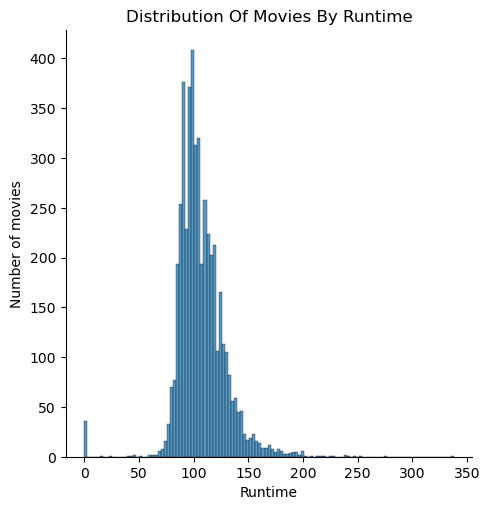

In [43]:
# Graph showing distribution of movies by runtime.

plt.figure(figsize = (5,5))  # Graph dimensions.

sns.displot(data = df,          # Create distribution plot.
            x = 'runtime')

plt.title('Distribution of movies by runtime'.title())    # Add a graph title.
plt.ylabel('Number of movies')    # y axis label.
plt.xlabel('Runtime')     # x axis label.

plt.show()

##### Tagline column
* Replaced all null values with 'No tagline'.

In [47]:
# Can assume that tagline nulls mean that this is no tagline.
df[df.tagline.isnull()].head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400
56,185000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.startrekmovie.com/,188927,"[{""id"": 9663, ""name"": ""sequel""}, {""id"": 9743, ...",en,Star Trek Beyond,The USS Enterprise crew explores the furthest ...,65.352913,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-07-07,343471816,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Star Trek Beyond,6.6,2568
66,175000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",http://disney.go.com/disneypictures/up/,14160,"[{""id"": 965, ""name"": ""age difference""}, {""id"":...",en,Up,Carl Fredricksen spent his entire life dreamin...,92.201962,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,735099082,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Up,7.7,6870
78,175000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",http://movies.disney.com/the-jungle-book-2016,278927,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Jungle Book,After a threat from the tiger Shere Khan force...,94.199316,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2016-04-07,966550600,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Jungle Book,6.7,2892
128,150000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ...",http://www.angelsanddemons.com/,13448,"[{""id"": 588, ""name"": ""rome""}, {""id"": 716, ""nam...",en,Angels & Demons,Harvard symbologist Robert Langdon investigate...,67.447636,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}, {""iso_...",2009-05-13,356613439,138.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Angels & Demons,6.5,2129


In [49]:
# Fill in null values with 'No tagline'.
df[['tagline']] = df[['tagline']].fillna(value = 'No tagline',
                                         method = None)

In [51]:
# Now there are no nulls in the tagline column.
df[df.tagline.isnull()].shape

(0, 20)

##### Summary
- Dataframe now contains no nulls..
- There are now 4802 rows.
- There are still 20 columns.

In [53]:
# Dataframe now contains no nulls.
df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [55]:
df.shape
# Remember there is now one less row.

(4802, 20)

## Dealing with the columns

#### Convert strings to lists
* Five columns contained lists of 0 or more dictionaries that contained a value corresponding to the column:
    * <i>genres,</i>
    * <i>keywords,</i>
    * <i>production companies,<i/>
    * <i>production countries,<i/>
    * <i>spoken languages.<i/>
* However, these lists were in the form of a string.
* I wanted to know the distinct genres of the movies so I added new columns with these strings converted to lists.
    * (Note): the dataframe now has 25 columns.

In [59]:
# The genres, keywords, production_companies, production_countries, spoken_languages columns contain lists.
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [61]:
# However, I cannot access these lists as their data type is 'object'.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4802 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4802 non-null   int64  
 1   genres                4802 non-null   object 
 2   homepage              4802 non-null   object 
 3   id                    4802 non-null   int64  
 4   keywords              4802 non-null   object 
 5   original_language     4802 non-null   object 
 6   original_title        4802 non-null   object 
 7   overview              4802 non-null   object 
 8   popularity            4802 non-null   float64
 9   production_companies  4802 non-null   object 
 10  production_countries  4802 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4802 non-null   int64  
 13  runtime               4802 non-null   float64
 14  spoken_languages      4802 non-null   object 
 15  status                4802

In [63]:
# This is a string. I want to convert the genres column to list type.
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [65]:
# Using the ast library we can convert the strings to lists.
# We will add new columns for the 'list versions' of the columns.
import ast

# Function converts the 'list string' to a list.
def convert_list(x):
    return ast.literal_eval(x)

# Create new columns for the 'list version' of each of the relevant columns.
df['genres_list'] = df.genres.apply(convert_list)
df['keywords_list'] = df.keywords.apply(convert_list)
df['production_companies_list'] = df.production_companies.apply(convert_list)
df['production_countries_list'] = df.production_countries.apply(convert_list)
df['spoken_languages_list'] = df.spoken_languages.apply(convert_list)

In [67]:
# Now this is a list, as required.
df['genres_list'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [69]:
# There are now 5 extra columns.
df.shape

(4802, 25)

In [71]:
# This function displays the number of distinct values in each of the new columns.
def col_distinct(column):
    col_list = []
    for lst in df[column]:
        for dict in lst:
            if dict['name'] not in col_list:
                col_list.append(dict['name'])
    print(len(col_list))

col_distinct('genres_list')
col_distinct('keywords_list')
col_distinct('production_companies_list')
col_distinct('production_countries_list')
col_distinct('spoken_languages_list')

20
9813
5017
88
62


#### Number of distinct values for 'list' columns
- __20 distinct genres.__
- 9813 distinct keywords.
- 5017 distinct production companies.
- 88 distinct production countries.
- 62 distinct spoken languages.

#### Exploring distinct genres
* Created a list of the 20 distinct genres.

In [74]:
# Create a list of distinct columns.

# This function returns a list of distinct values (same function from above except it returns col_list).
def col_distinct(column):
    col_list = []
    for lst in df[column]:
        for dict in lst:
            if dict['name'] not in col_list:
                col_list.append(dict['name'])
    return col_list

distinct_genres = col_distinct('genres_list')     # I will use this list later!!!

Figuring out how to extract data from df using the distinct genres list and the new list columns in df:

In [76]:
# This will print each distinct genre followed by the number of appearances in the dataframe df.
for item in distinct_genres:
    print(item)
    print(df.genres.str.contains(item).sum()) 
    
    # Notice we use the original genres 'string' column to see if it contains the specified genre.

Action
1154
Adventure
790
Fantasy
424
Science Fiction
535
Crime
696
Drama
2297
Thriller
1274
Animation
234
Family
513
Western
82
Comedy
1722
Romance
894
Horror
519
Mystery
348
History
197
War
144
Music
185
Documentary
110
Foreign
34
TV Movie
8


In [78]:
# The most number of genres a movie has is 7.
max_genres = 0
for lst in df.genres_list:
    if len(lst) > max_genres:
        max_genres = len(lst)
print(max_genres)

7


## Looking into correlations
* I wanted to find out the relationship between relevant numeric columns in the dataframe.
* I introduced two new columns (profit and profit percentage) to include in the correlation map.

In [82]:
# Want to see the profit and profit percentage correlations too so add these columns to df.
df['profit'] = df.revenue - df.budget

In [84]:
# Profit percentage is a ratio between the profit and the cost of the movie.
df['profit_percentage'] = df.profit/df.budget * 100

In [86]:
# There are now two more columns.
df.shape

(4802, 27)

In [88]:
# Create a smaller dataframe containing only the numeric columns I want in the correlation.
corr_columns = df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'profit', 'profit_percentage']]

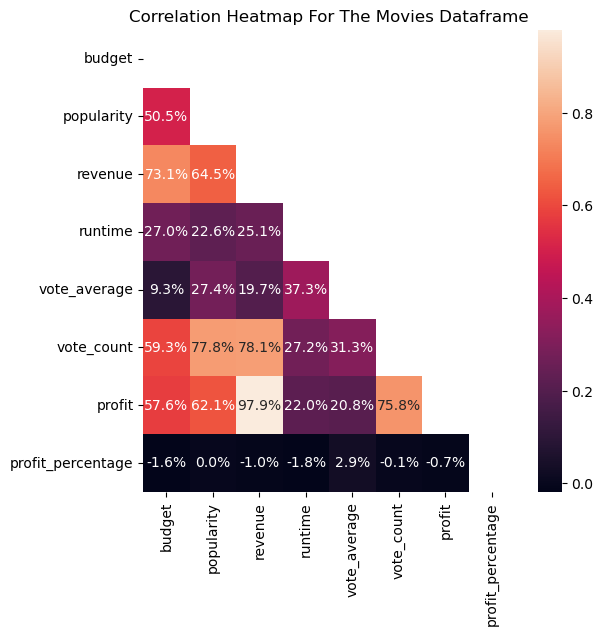

In [90]:
# Create a heatmap showing the correlation between different columns in the movies dataframe.

plt.figure(figsize = (6,6))                  # Graph dimensions.

sns.heatmap(data = corr_columns.corr(),                  # Use data from the new corr_columns dataframe.
            annot = True,
            fmt = '.1%',
            mask = np.triu(corr_columns.corr()))

plt.title('Correlation heatmap for the movies dataframe'.title())      # Add a graph title.

plt.show()

#### Key Observations:
- Revenue has very strong correlation with profit, but NOT with profit percentage.
- Runtime and Vote Average have weak correlation with all the other categories.

## Creating new dataframe for the distinct genres
* I created a new dataframe containing aggregates for each distinct genre.
* Columns:
    * _genres,_
    * _count,_
    * _avg_budget,_
    * _avg_popularity,_
    * _avg_revenue,_
    * _vote_average,_
    * _avg_vote_count,_
    * _avg_profit,_
    * _percentage_profit._

In [92]:
# Create columns in df for every distinct genre.
# Distinct genre entry = True if it is in the list of genres, False otherwise.

for genre in distinct_genres:                    # Loops through each distinct genre.
    df[genre] = df.genres.str.contains(genre)    # Adds a new column to df for each genre.

df.shape
# There are now 20 more columns in the dataframe.

(4802, 47)

In [94]:
# Create new 'aggregate' dataframe where each row contains a distinct genre.
genre_df = pd.DataFrame()
genre_df['genres'] = distinct_genres

In [96]:
# Create count of distinct genres column.

# This function and the following functions aggregates the data in df for each genre.
def count_genre(genre):
    return df.genres.str.contains(genre).sum()            

genre_df['count'] = genre_df['genres'].apply(count_genre)         # Apply the function to the new genre_df dataframe.

In [98]:
# Create average budget column.
def average_budget(genre):
    return df.groupby(genre)[['budget']].mean().reset_index()['budget'][1]
    # Index position 0 of the groupby is genre = False.
    # Index position 1 of the groupby is genre = True ----- So we only want the return the value of the mean budget in the second row (index position 1).

genre_df['avg_budget'] = genre_df['genres'].apply(average_budget)

In [100]:
# Create average popularity column.
def average_popularity(genre):
    return df.groupby(genre)[['popularity']].mean().reset_index()['popularity'][1]

genre_df['avg_popularity'] = genre_df['genres'].apply(average_popularity)

In [102]:
# Create average revenue column.
def average_revenue(genre):
    return df.groupby(genre)[['revenue']].mean().reset_index()['revenue'][1]

genre_df['avg_revenue'] = genre_df['genres'].apply(average_revenue)

In [104]:
# Create average runtime column.
def average_runtime(genre):
    return df.groupby(genre)[['runtime']].mean().reset_index()['runtime'][1]

genre_df['avg_runtime'] = genre_df['genres'].apply(average_runtime)

In [106]:
# Create vote average column.
def average_vote_average(genre):
    return df.groupby(genre)[['vote_average']].mean().reset_index()['vote_average'][1]

genre_df['vote_average'] = genre_df['genres'].apply(average_vote_average)

In [108]:
# Create average vote count column.
def average_vote_count(genre):
    return df.groupby(genre)[['vote_count']].mean().reset_index()['vote_count'][1]

genre_df['avg_vote_count'] = genre_df['genres'].apply(average_vote_count)

In [110]:
# Create average profit column.

# We don't need to use df for this column.
genre_df['avg_profit'] = genre_df.avg_revenue - genre_df.avg_budget 

In [112]:
# Create profit percentage column.

# We don't need to use df for this column.
genre_df['percentage_profit'] = genre_df.avg_profit/genre_df.avg_budget *100

## Genre Df insights
* I created the following visualisations from my new dataframe:
    * __Average Vote by Genre,__
    * __Profit by Genre.__

In [115]:
# The new dataframe I created.
genre_df

,genres,count,avg_budget,avg_popularity,avg_revenue,avg_runtime,vote_average,avg_vote_count,avg_profit,percentage_profit
0,Action,1154,5.151075e+07,30.940382,1.412131e+08,110.544194,5.989515,1135.814558,8.970235e+07,174.142960
1,Adventure,790,6.632686e+07,39.268042,2.086602e+08,111.332911,6.156962,1430.669620,1.423333e+08,214.593817
2,Fantasy,424,6.356061e+07,36.387043,1.933542e+08,107.278302,6.096698,1323.983491,1.297936e+08,204.204538
3,Science Fiction,535,5.186555e+07,36.451806,1.524565e+08,107.478505,6.005607,1425.585047,1.005910e+08,193.945619
4,Crime,696,2.784981e+07,22.853274,6.615066e+07,109.666667,6.274138,752.599138,3.830085e+07,137.526455
5,Drama,2297,2.067832e+07,17.764853,5.211623e+07,113.265564,6.388594,532.280801,3.143791e+07,152.033141
6,Thriller,1274,3.196821e+07,24.460077,8.104429e+07,107.544741,6.010989,772.845369,4.907608e+07,153.515285
7,Animation,234,6.646590e+07,38.813439,2.256930e+08,89.923077,6.341453,1246.170940,1.592271e+08,239.562119
8,Family,513,5.071951e+07,27.832849,1.623455e+08,97.298246,6.029630,902.290448,1.116260e+08,220.084891
9,Western,82,2.707870e+07,18.236279,4.624596e+07,117.353659,6.178049,607.853659,1.916726e+07,70.783533


### Average vote by genre

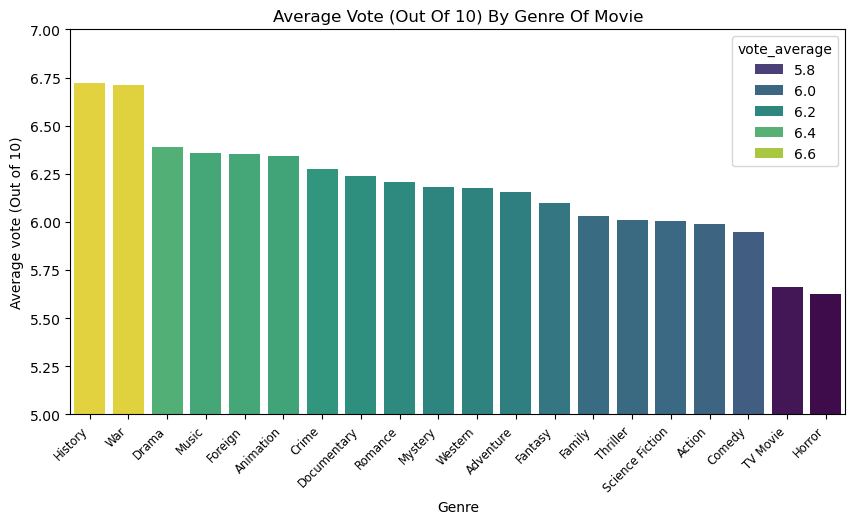

In [118]:
# Create average vote by genre graph.
 
plt.figure(figsize = (10,5))             # Graph dimensions.

sns.barplot(data = genre_df.sort_values(by = 'vote_average', ascending = False),      # Create the graph (using data sorted by vote_average to order the graph).
            x = 'genres',
            y = 'vote_average',
            palette = 'viridis',
            hue = 'vote_average')

plt.ylim(5,7)          # Limit the y axis to be within the range of 5-7. Shows the difference between genres better.

plt.xticks(rotation = 45,                       # Rotate the x axis labels.
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'small',
          )

plt.title('Average vote (out of 10) by genre of movie'.title())       # Add a graph title.
plt.ylabel('Average vote (Out of 10)')       # y axis label.
plt.xlabel('Genre')        # x axis label.

plt.show()

#### Insights
- History and War films have the highest average rating.
- TV Movie and Horror films have the lowest average rating.

### Profit by genre

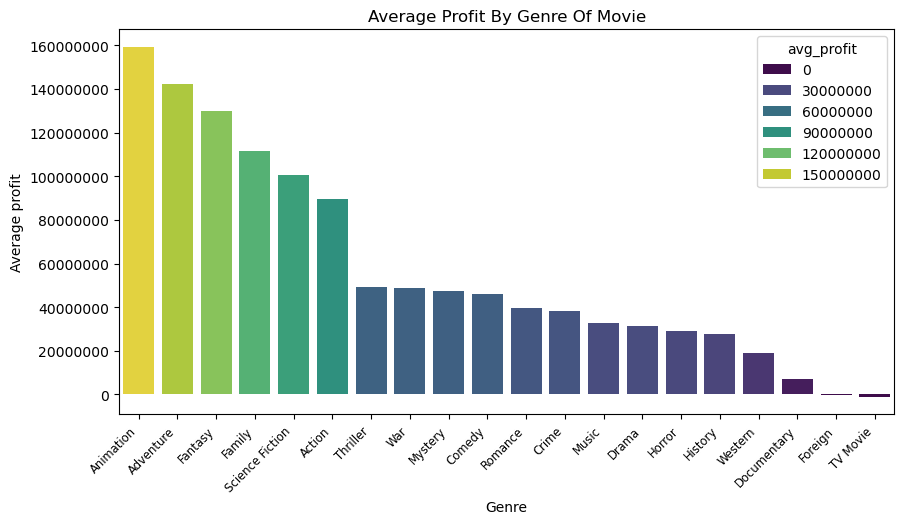

In [120]:
# Create average profit by genre graph.

plt.figure(figsize = (10,5))    # Graph dimensions.

sns.barplot(data = genre_df.sort_values(by = 'avg_profit', ascending = False),      # Create the graph (using data sorted by avg_profit to order the graph).
            x = 'genres',
            y = 'avg_profit',
            palette = 'viridis',
            hue = 'avg_profit') 

plt.ticklabel_format(axis='y', style='plain')     # Get rid of standard form numbers in the y axis (replaced by the full numbers).

plt.xticks(rotation = 45,                         # Rotate the x axis labels.
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'small',
          )

plt.title('Average profit by genre of movie'.title())     # Add a graph title.
plt.ylabel('Average profit')            # y axis label.
plt.xlabel('Genre')                   # x axis label.

plt.show()

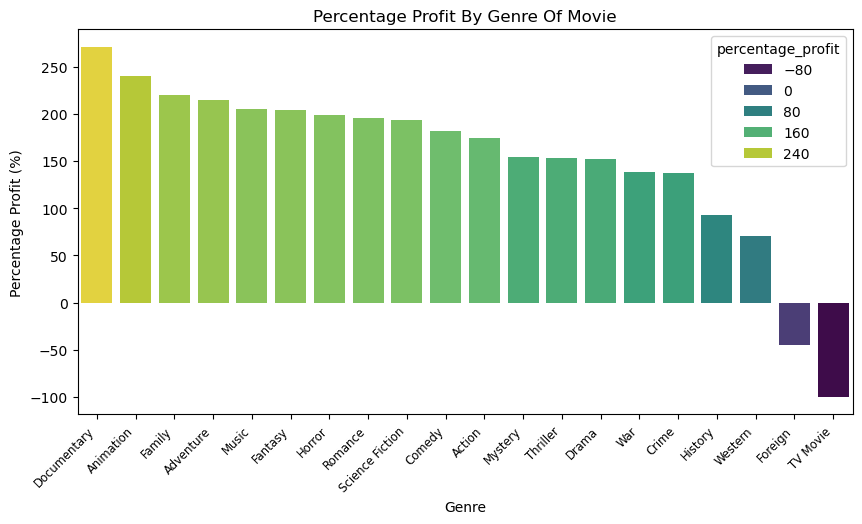

In [122]:
# Create percentage profit by genre graph.

plt.figure(figsize = (10,5))     # Graph dimensions.

sns.barplot(data = genre_df.sort_values(by = 'percentage_profit', ascending = False),     # Create the graph (using data sorted by percentage_profit to order the graph).
            x = 'genres',
            y = 'percentage_profit',
            palette = 'viridis',
            hue = 'percentage_profit')

plt.xticks(rotation = 45,                        # Rotate the x axis labels.
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'small',
          )

plt.title('Percentage Profit by genre of movie'.title())     # Add a graph title.
plt.ylabel('Percentage Profit (%)')    # y axis label.
plt.xlabel('Genre')     # x axis label.

plt.show()

#### Insights
* Documentaries have the best profit percentage, but not the most profit on average.
    * This shows that documentaries aren't a big genre but can be great profit-makers for small production companies.
* Animation and family films generally do well.
* TV movies have made 100% loss.

## Comparing Profitable movies to Loss-making movies
* Documentary is the best genre for profit percentage. So we will see the top 3 documentaries by profit percentage.
* TV movies have made the most losses. So we will look at the TV movies with the lowest profit percentage.

In [124]:
# Tarnation is the documentary with the largest profit percentage (532933% profit).
pd.set_option("display.max_columns", None)
df[(df.genres.str.contains('Documentary')) & (df.budget > 0)][['title', 'budget', 'revenue', 'profit', 'profit_percentage']]\
    .sort_values(by = 'profit_percentage', ascending = False).head(3)

,title,budget,revenue,profit,profit_percentage
4582,Tarnation,218,1162014,1161796,532933.944954
4742,Super Size Me,65000,28575078,28510078,43861.658462
4497,Woodstock,600000,34505110,33905110,5650.851667


In [126]:
# The only TV movie genre movies with a budget greater than zero. They have all made 0 revenue.
df[(df.genres.str.contains('TV Movie')) & (df.budget > 0)][['title','budget', 'revenue', 'profit', 'profit_percentage']]

,title,budget,revenue,profit,profit_percentage
3731,High School Musical,4200000,0,-4200000,-100.0
3809,How to Fall in Love,4000000,0,-4000000,-100.0
3843,Sharknado,1000000,0,-1000000,-100.0


In [128]:
# There are only 8 TV movies in total (and only 3 with a budget > 0).
df[(df.genres.str.contains('TV Movie'))].shape

(8, 47)

##### Notes:
* All TV movies have -100% profit percentage.
* This is due to all TV movies showing as making 0 revenue.
* This cannot realistically be the case, particularly for movies like High School Musical with a budget of 4.2 million.
* We will need to find out what the revenue column is based on.

## Conclusions

> I have uncovered many insights when exploring this movie data and I will now summarise the main points to take away from this project.
>
> * There are 36 movies in the data that have a runtime of 0. It is hard to believe this to be correct and we need to find out why this is the case.
> * Amount of revenue has a very strong correlation with amount of profit. However, amount of revenue has a very weak correlation with profit as a percentage of the budget. With more time we could try and find factors that have a strong correlation with the profit percentage.
> * Animated movies, adventure movies, and family movies seem to be the best genres for creating profit. Documentaries don't create much profit but have the best profit percentage.
> * The data shows that TV movies make 100% loss. By looking at the specific movies in this genre, I have discovered that the data shows that these movies have no revenue. These movies cost millions to make and had to have made some money, so we need to find out what the revenue column values are based on.